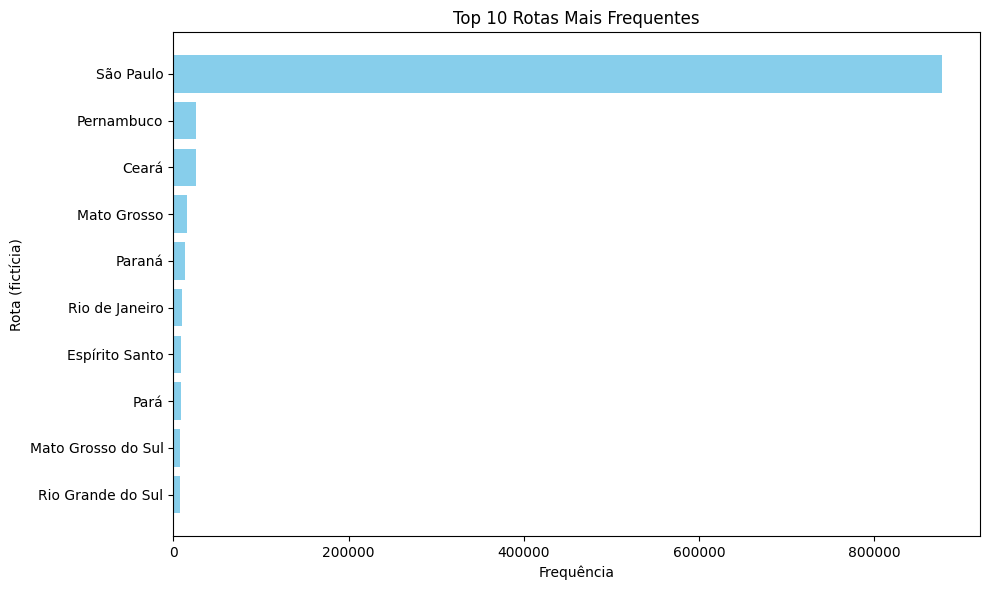

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------
# 1. Supondo que o df já está carregado
# ---------------------------
# df deve ter as colunas:
# place_origin_departure, place_destination_departure, place_origin_return, place_destination_return
df = pd.read_csv(r"C:\Users\polly\OneDrive\Área de Trabalho\challenge2completo\df_t.csv")

# Criar colunas de rota de ida e volta
df["rota_ida"] = df["place_origin_departure"] + " -> " + df["place_destination_departure"]
df["rota_volta"] = df["place_origin_return"] + " -> " + df["place_destination_return"]

# Empilhar todas as rotas
rotas = pd.concat([df["rota_ida"], df["rota_volta"]])

# Contar frequência
rotas_frequentes = rotas.value_counts().reset_index()
rotas_frequentes.columns = ["RotaHash", "Frequência"]

# ---------------------------
# 2. Mapear hashes para estados fictícios
# ---------------------------
estados = [
    "São Paulo", "Rio de Janeiro", "Minas Gerais", "Bahia", "Paraná", 
    "Santa Catarina", "Rio Grande do Sul", "Pernambuco", "Ceará", "Goiás",
    "Mato Grosso", "Mato Grosso do Sul", "Espírito Santo", "Amazonas", "Pará"
]

# Aleatorizar estados (exceto São Paulo)
rng = np.random.default_rng(seed=42)
estados_random = rng.permutation(estados[1:])  # São Paulo fixo

# Mapear hashes para estados fictícios
hashes_unicos = rotas_frequentes["RotaHash"].unique()
mapa_estados = {}

# Garantir que a rota mais frequente seja São Paulo
mapa_estados[hashes_unicos[0]] = "São Paulo"

# Atribuir os demais estados aleatoriamente
for i, h in enumerate(hashes_unicos[1:], start=0):
    mapa_estados[h] = estados_random[i % len(estados_random)]

# Aplicar o mapeamento
rotas_frequentes["Rota"] = rotas_frequentes["RotaHash"].map(mapa_estados)

# ---------------------------
# 3. Plotar gráfico das Top 10 rotas
# ---------------------------
top10 = rotas_frequentes.head(10)

plt.figure(figsize=(10,6))
plt.barh(top10["Rota"], top10["Frequência"], color="skyblue")
plt.xlabel("Frequência")
plt.ylabel("Rota (fictícia)")
plt.title("Top 10 Rotas Mais Frequentes")
plt.gca().invert_yaxis()  # rota mais frequente no topo
plt.tight_layout()
plt.show()
